<a href="https://colab.research.google.com/github/massaoiwanaga/topespsi/blob/main/TESI_VAC_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Disciplina Topicos Especiais em Sistemas de Informação I**

---

## **Saúde (COVID-19)**

> Alessandra Pierro Saraiva
>
> Fabiane Monteiro Carvalho
>
> Massao Oliveira Iwanaga

In [ ]:
# Testado no ambiente Google Colab - 1.0.0
# Python 3.7.10 
#
# Bibliotecas utilizadas:
#  numpy 1.19.5
#  pandas 1.1.5
#  matplotlib 3.2.2
#  pandas_profiling 1.4.1
#  prov 2.0.0
#  IPython 5.5.0

## Importando a biblioteca pandas

In [3]:
# importando a biblioteca
import pandas as pd # pandas
import numpy as np  # numpy
import matplotlib.pyplot as plt                # importar a biblioteca matplotlib
import pandas_profiling

## Instalação da biblioteca PROV

In [2]:
#Instalação da biblioteca PROV no ambiente COLAB
#Essa biblioteca implementa em Python o Modelo de Dados PROV da W3C
!pip install prov

     |████████████████████████████████| 430kB 7.7MB/s 
     |████████████████████████████████| 235kB 9.7MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 


## Acessar dados do Google Drive

In [4]:
# Se você está executando o notebook no Google Colab, é necessário montar o drive para o ambiente virtual do Google Drive
# Clicar no link que aparecerá e será gerada uma chave, que deverá ser colada no campo "Autorization code"

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Informações de proveniência

In [5]:
# Working with PROV

import sys, subprocess, datetime, random
from prov.model import ProvDocument                                                 #PROV Library


In [6]:
# Retrospective Provenance variables
agent    = input("Enter the name of the AGENT WHO is running the program: ")        #PROV-Agent
entity   = input("Enter the name of the ENTITY dataset: ")                          #PROV-Entity
activity = input("Enter the name of the ACTIVITY: ")                                #PROV-Activity
graph = entity                                                                      #PROV-Graph

Enter the name of the AGENT WHO is running the program: Massao
Enter the name of the ENTITY dataset: Vacinação
Enter the name of the ACTIVITY: Ler


In [7]:
### BEGIN - Registering Retrospective Provenance -             #PROV-MODEL

# Creating an empty provenance document
d1 = ProvDocument()                                                 

In [8]:
# Declaring namespaces for various prefixes used in the excution of the experiment
d1.add_namespace('dados.gov.br', 'https://dados.gov.br/dataset/covid-19-vacinacao/')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('greco', 'http://www.ufrj.br/ppgi/greco/#')

# Adding an entity
entity = "dados.gov.br:"+ entity
e1 = d1.entity(entity)

# Adding an Agent 
agent = "foaf:"+ agent
d1.agent(agent)

# Attributing the execution of the experiment to the PROV-Agent
d1.wasAttributedTo(e1, agent)

# Adding an activity
activity = "greco:"+ activity
d1.activity(activity)

# Generation
d1.wasGeneratedBy( entity, activity)

<ProvGeneration: (dados.gov.br:Vacinação, greco:Ler)>

In [9]:
# Adding a role to the PROV-Agent and timestamp to dataset
d1.agent(agent, {'prov:hadRole': 'Executor', 'foaf:mbox': 'massaoiwanaga@ufrj.br', 'prov:attributedAtTime': str(datetime.datetime.utcnow())})
d1.entity(entity, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})

### END - Registering Retrospective Provenance 

<ProvEntity: dados.gov.br:Vacinação>

In [10]:
### Optional outputs ####

#Generating the outup - a  Provenance Graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
graph = graph +".png"
dot.write_png('/content/drive/My Drive/TESI_FCD/'+graph)

In [11]:
#Generating the Serialization - Output XML
d1.serialize(entity + ".xml", format='xml') 

#Generating the Serialization - Output Turtle
d1.serialize(entity + ".ttl", format='rdf', rdf_format='ttl') 

In [12]:
#Generating the outup of Provenance document
print ('')
print ('simple provenance doc')
print(d1.get_provn())
print ('')


simple provenance doc
document
  prefix dados.gov.br <https://dados.gov.br/dataset/covid-19-vacinacao/>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix greco <http://www.ufrj.br/ppgi/greco/#>
  
  entity(dados.gov.br:Vacinação)
  agent(foaf:Massao)
  wasAttributedTo(dados.gov.br:Vacinação, foaf:Massao)
  activity(greco:Ler, -, -)
  wasGeneratedBy(dados.gov.br:Vacinação, greco:Ler, -)
  agent(foaf:Massao, [prov:hadRole="Executor", foaf:mbox="massaoiwanaga@ufrj.br", prov:attributedAtTime="2021-03-22 21:57:41.837420"])
  entity(dados.gov.br:Vacinação, [prov:generatedAtTime="2021-03-22 21:57:41.837660"])
endDocument



In [13]:
#Generating the Serialization - Output JSON
print ('')
print ('simple provenance JSON')
print(d1.serialize(indent=2))
print('')


simple provenance JSON
{
  "prefix": {
    "dados.gov.br": "https://dados.gov.br/dataset/covid-19-vacinacao/",
    "foaf": "http://xmlns.com/foaf/0.1/",
    "greco": "http://www.ufrj.br/ppgi/greco/#"
  },
  "entity": {
    "dados.gov.br:Vacina\u00e7\u00e3o": [
      {},
      {
        "prov:generatedAtTime": "2021-03-22 21:57:41.837660"
      }
    ]
  },
  "agent": {
    "foaf:Massao": [
      {},
      {
        "prov:hadRole": "Executor",
        "foaf:mbox": "massaoiwanaga@ufrj.br",
        "prov:attributedAtTime": "2021-03-22 21:57:41.837420"
      }
    ]
  },
  "wasAttributedTo": {
    "_:id1": {
      "prov:entity": "dados.gov.br:Vacina\u00e7\u00e3o",
      "prov:agent": "foaf:Massao"
    }
  },
  "activity": {
    "greco:Ler": {}
  },
  "wasGeneratedBy": {
    "_:id2": {
      "prov:entity": "dados.gov.br:Vacina\u00e7\u00e3o",
      "prov:activity": "greco:Ler"
    }
  }
}



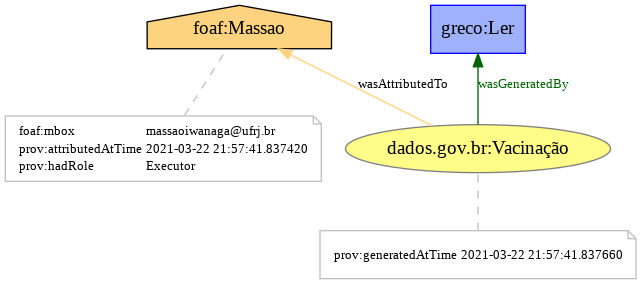

In [14]:
# Adding Vizualization the provenance graph in the Jupyter notebook
from IPython.display import Image
Image('/content/drive/My Drive/TESI_FCD/'+graph)

## Variáveis gerais do trabalho proposto

In [6]:
## Merge entre os dataFrames de Vacinação e CNES# UFs das regiões norte e sudeste, que serão analisadas no trabalho

UFs = ['RJ', 'SP','MG', 'ES', 'AM', 'AC', 'AP', 'PA', 'RO', 'RR', 'TO']

## Importação e tratamento do DataSet de Vacinação

In [7]:
# Salve o dataset de vacinação no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_vacinacao = pd.read_csv('/content/drive/My Drive/TESI_FCD/part-00000-090405dc-80c4-4889-84c3-a9a390d06947-c000.csv',delimiter=',')

### Exploração inicial do DataSet de Vacinação

In [14]:
# Código reprodutível
# assert len(df_vacinacao) == 6958578

In [15]:
print('Total de registros:',len(df_vacinacao))    # Quantidade de registros do dataset
print('')
print(df_vacinacao.info())  # Informações sobre o dataset 

# Observe o total de linhas e o total de colunas (33) do dataset

Total de registros: 7908949

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7908949 entries, 0 to 7908948
Data columns (total 26 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         float64
 8   paciente_endereco_coPais                  float64
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_nacionalidade_enumNacionalidade  object 
 13  estabelecimento_valor       

In [16]:
df_vacinacao.head(10)        # Visualização dos registros iniciais

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds
0,60aeb975-94ed-4113-a8b0-ac55dbb8ab41-i0b0,433768b2c569be2ff29976dea5cddd0eeb907de38c254e...,79.0,1942-01-28,F,1.0,BRANCA,432225.0,10.0,TUPANDI,BRASIL,RS,B,2227428,431950.0,SAO SEBASTIAO DO CAI,RS,301,Pessoas de 60 nos ou mais Institucionalizadas,3.0,Pessoas de 60 anos ou mais institucionalizadas,FUNDACAO BUTANTAN,2021-02-16T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-19 03:20:03
1,b68c468e-8083-4cca-8da1-ea9a8decbaba-i0b0,8499ef2ad9174cee4bd4dac8ae172a706775f4c835cb17...,90.0,1930-09-11,M,2.0,PRETA,430930.0,10.0,GUAIBA,BRASIL,RS,B,2225999,430930.0,GUAIBA,RS,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-11T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-19 16:04:01
2,db74d38d-be6e-4b1a-82d0-e2797c3b55e7-i0b0,1c8b855733d6ea88081712bd74f95ca36bef67ac83b168...,91.0,1929-06-25,F,1.0,BRANCA,316900.0,10.0,TOCANTINS,BRASIL,MG,B,2162776,316900.0,TOCANTINS,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-12T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-15 19:32:10
3,2126698b-2d68-4559-afbd-2cfb665319d8-i0b0,b89cbe103ef31b4bbe4b101e56ad1c3f97a8772a9e440c...,81.0,1939-04-14,F,1.0,BRANCA,240800.0,10.0,MOSSORO,BRASIL,RN,B,7172605,240800.0,MOSSORO,RN,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO OSWALDO CRUZ,2021-02-19T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-20 03:36:33
4,58479a85-603d-4167-898d-e638b4204cc3-i0b0,9a8ae778fc10f5382ce36f1ffb538be3e0df908dd64498...,27.0,1993-12-30,F,1.0,BRANCA,350850.0,10.0,CACAPAVA,BRASIL,SP,B,6426247,350850.0,CACAPAVA,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-04T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-04 06:02:43
5,dd31f5e0-11be-4f20-b513-321d38fe7209-i0b0,4afd17a894ce085a0eb3385de1bd981b0fe8c3dba69f75...,37.0,1983-02-28,F,99.0,SEM INFORMACAO,150420.0,10.0,MARABA,BRASIL,PA,B,2614804,150420.0,MARABA,PA,908,Farmacêutico,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-23T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-24 12:51:16
6,7d70a956-4521-44da-ab0a-16c0704906e7-i0b0,883c5dd876b70d6822bd90f9635a9b69831916b44004e0...,83.0,1937-03-14,F,99.0,SEM INFORMACAO,NaN,NaN,NaN,NaN,NaN,B,2226960,431600.0,ROLANTE,RS,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-13T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 11:39:03
7,0fc13a2b-b5ca-4f8b-8771-82b0d38af987-i0b0,37b4d41cb87fcdbc8c3492d92ec79582fd4b4b7ce7f908...,96.0,1924-09-24,F,99.0,SEM INFORMACAO,355030.0,10.0,SAO PAULO,BRASIL,SP,B,4049942,355030.0,SAO PAULO,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,AstraZeneca/Oxford,2021-02-05T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-05 04:02:52
8,a7f11d1a-9875-41a4-8685-1840ae72ce7a-i0b0,607bb8b993afaa2a30d48a20aaba3e0e9ed233fcaa226f...,36.0,1984-10-10,F,3.0,PARDA,293076.0,10.0,SITIO DO QUINTO,BRASIL,BA,B,285293,293076.0,SITIO DO QUINTO,BA,926,Outros,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-19T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-23 13:30:53
9,8c713fb7-b97a-4540-9265-2e2dbc5a18a0-i0b0,1f9815fb6524de0051dffe223d0b236b4708abc1c9d560...,38.0,1982-08-08,F,1.0,BRANCA,353800.0,10.0,PINDAMONHANGABA,BRASIL,SP,B,2755068,353800.0,PINDAMONHANGABA,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-13T0

### Eliminação de colunas e linhas que não serão utilizadas - Dataset Vacinação

In [8]:
# Eliminação das colunas que não serão utilizadas nas análises

df_vacinacao = df_vacinacao.drop(['paciente_endereco_cep','estabelecimento_razaoSocial','estalecimento_noFantasia','vacina_lote','vacina_fabricante_referencia',
                                  'vacina_codigo','sistema_origem'],axis=1)

In [9]:
# Como o dataset possui dados de todo o Brasil, os estados que não pertencem às regiões selecionadas para análise serão eliminados do dataframe
df_vacinacao = df_vacinacao.loc[(df_vacinacao['estabelecimento_uf'].isin(UFs))]

In [ ]:
# Código reprodutível
# assert len(df_vacinacao) == 4036465

In [10]:
print('Total de registros:',len(df_vacinacao))    # Quantidade de registros do dataset após eliminação de linhas

print('')
print(df_vacinacao.info())                        # Informações sobre o dataset

## É possível observar a redução do número total de linhas e do número total de colunas (26) do dataset

Total de registros: 4536169

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4536169 entries, 2 to 7908948
Data columns (total 26 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         float64
 8   paciente_endereco_coPais                  float64
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_nacionalidade_enumNacionalidade  object 
 13  estabelecimento_valor       

### Tratamento de valores nulos e/ou faltantes

In [11]:
df_vacinacao.count()  # Quantidade de registros por coluna. 
                      # É possível observar que algumas colunas possuem quatidade inferior de registros, o que indica que será necessário 
                      #    tratamento de dados se essas colunas forem necessárias para análise

document_id                                 4536169
paciente_id                                 4536169
paciente_idade                              4536169
paciente_dataNascimento                     4536169
paciente_enumSexoBiologico                  4536169
paciente_racaCor_codigo                     4536169
paciente_racaCor_valor                      4536169
paciente_endereco_coIbgeMunicipio           4513076
paciente_endereco_coPais                    4513157
paciente_endereco_nmMunicipio               4513115
paciente_endereco_nmPais                    4513157
paciente_endereco_uf                        4513076
paciente_nacionalidade_enumNacionalidade    4529352
estabelecimento_valor                       4536169
estabelecimento_municipio_codigo            4536169
estabelecimento_municipio_nome              4536169
estabelecimento_uf                          4536169
vacina_grupoAtendimento_codigo              4536169
vacina_grupoAtendimento_nome                4471613
vacina_categ

In [59]:
#In Pandas missing data is represented by two value:
    #None: None is a Python singleton object that is often used for missing data in Python code.
    #NaN : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation
#Pandas treat None and NaN as essentially interchangeable for indicating missing or null values.

#Número de registros (linhas) do arquivo antes da limpeza
#index = df_vacinacao.index
#num_linhas = len(index)
#num_linhas #4536169

#Contando o número de registros (linhas) com o campo "paciente_endereco_nmMunicipio" nulo
#bool_series = pd.isnull(df_vacinacao["paciente_endereco_nmMunicipio"])
#df_vacinacao[bool_series]

#Eliminando linhas em que o campo "paciente_endereco_nmMunicipio" for nulo
#df_vacinacao = df_vacinacao.dropna(subset=['paciente_endereco_nmMunicipio'])
#df_vacinacao = df_vacinacao.dropna(subset=['paciente_endereco_nmMunicipio', 'estabelecimento_municipio_nome'])


In [ ]:
# Código reprodutível
# Incluir alguma validação em relaçao ao conteúdo das colunas que serão trabalhadas, usando o comando assert - ideia: valor mínimo, máximo ou média

###Tratamento de cor

In [12]:
#df_vacinacao.query('paciente_racaCor_codigo not in ["1", "2", "3", "4", "99"]')

#Aqui verificou-se a existência de outra raça/cor não contemplada no dicionário de dados:
#raça/cor = 5 (indígena) com 77831 registros encontrados
#df_vacinacao.query('paciente_racaCor_codigo  in ["5"]')

#Aqui verificou-se que não existe ocorrência de valor de raça/cor diferente de "1", "2", "3", "4", "5", "99", logo nenhum tratamento foi preciso
df_vacinacao.query('paciente_racaCor_codigo not in ["1", "2", "3", "4", "5", "99"]')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds


### Identificação e tratamento de valores duplicados

In [18]:
#Lista todos os registros em que o "paciente_id" apareça mais de 2 vezes
df_vacinacao[df_vacinacao['paciente_id'].isin(df_vacinacao['paciente_id'].value_counts()[df_vacinacao['paciente_id'].value_counts()>2].index)].sort_values(by=["paciente_id"])

#df_vacinacao.duplicated(subset=['document_id'])
#df_vacinacao[df_vacinacao.duplicated(subset=['paciente_id'], keep=False)].sort_values(by=["paciente_id"])

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds
2167262,9fbb3bdc-63f2-4d25-b0a0-2ec9bd7e9c03-i0b0,0002803e634499dd19caeb400348a0246e8ed255bd4fac...,36.0,1984-06-14,F,99.0,SEM INFORMACAO,354990.0,10.0,SAO JOSE DOS CAMPOS,BRASIL,SP,B,8990,354990.0,SAO JOSE DOS CAMPOS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 03:00:00
4453107,0e65a0ae-4d28-4fd0-b1cf-20ab70aa40ab-i0b0,0002803e634499dd19caeb400348a0246e8ed255bd4fac...,36.0,1984-06-14,F,99.0,SEM INFORMACAO,354990.0,10.0,SAO JOSE DOS CAMPOS,BRASIL,SP,B,8990,354990.0,SAO JOSE DOS CAMPOS,SP,0,NaN,NaN,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-15T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 14:23:00
2696535,f8f2b974-94f0-4a8c-b928-89e69a3f87b8-i0b0,0002803e634499dd19caeb400348a0246e8ed255bd4fac...,36.0,1984-06-14,F,99.0,SEM INFORMACAO,354990.0,10.0,SAO JOSE DOS CAMPOS,BRASIL,SP,B,9296,354990.0,SAO JOSE DOS CAMPOS,SP,0,NaN,NaN,NaN,SERUM INSTITUTE OF INDIA LTD,2021-01-25T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 14:14:27
1195871,0b964871-30ba-457b-b4b7-8dc564e10000-i0b0,0002803e634499dd19caeb400348a0246e8ed255bd4fac...,36.0,1984-06-14,F,99.0,SEM INFORMACAO,354990.0,10.0,SAO JOSE DOS CAMPOS,BRASIL,SP,B,8990,354990.0,SAO JOSE DOS CAMPOS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-12T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-12 03:00:00
2526108,3a2815b0-98cf-48b0-ba16-c548dcf4c00f-i0b0,0002ed6bb9e4a7f27ca1ba8f62c9b1502356ba8141933f...,28.0,1992-11-09,F,1.0,BRANCA,355540.0,10.0,UBATUBA,BRASIL,SP,B,2270315,330455.0,RIO DE JANEIRO,RJ,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-01-20T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-17 23:20:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175387,331dd088-6a01-440f-b624-bbdd9413f2a3-i0b0,fff87e7b4465b0b248ffcb3f3c64a2ac1ed306a2e2c132...,43.0,1977-05-18,F,99.0,SEM INFORMACAO,354990.0,10.0,SAO JOSE DOS CAMPOS,BRASIL,SP,B,9040,354990.0,SAO JOSE DOS CAMPOS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-12T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-12 03:00:00
5682370,9c2b150f-8604-43a7-b4ac-8e99f6cf740d-i0b0,fff87e7b4465b0b248ffcb3f3c64a2ac1ed306a2e2c132...,43.0,1977-05-18,F,99.0,SEM INFORMACAO,354990.0,10.0,SAO JOSE DOS CAMPOS,BRASIL,SP,B,3708616,354990.0,SAO JOSE DOS CAMPOS,SP,0,NaN,NaN,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-12T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 14:22:03
7869997,5901dde1-af82-4b71-ae7b-ff5e4a23b5f9-i0b0,fffe8f28b0481890d7bca6d0d0ed56d89a1b06993f2108...,34.0,1986-04-04,F,1.0,BRANCA,354990.0,10.0,SAO JOSE DOS CAMPOS,BRASIL,SP,B,8990,354990.0,SAO JOSE DOS CAMPOS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-03-02T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-02 03:00:00
2559859,b678a1d0-7089-487b-9155-f40100e7e615-i0b0,fffe8f28b0481890d7bca6d0d0ed56d89a1b06993f2108...,34.0,1986-04-04,F,1.0,BRANCA,354990.0,10.0,SAO JOSE DOS CAMPOS,BRASIL,SP,B,8990,354990.0,SAO JOSE DOS CAMPOS,SP,0,NaN,NaN,NaN,SERUM INSTITUTE OF INDIA LTD,2021-02-04T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 14:17:21


## Análises

In [ ]:
# Vacinados fora dos seus Municípios de residência mas no mesmo Estado

df_vacinacao.query('paciente_endereco_uf in ["ES", "MG", "RJ", "SP"] & paciente_endereco_uf == estabelecimento_uf & paciente_endereco_nmMunicipio != estabelecimento_municipio_nome')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds
10,02fe1f0e-06d5-4109-a533-d6603dbaca6d-i0b0,a6e0a508c903a0939ae3322684ebb9941622dedc9b98de...,53.0,1967-11-09,F,1.0,BRANCA,353860,10,PIRACAIA,BRASIL,SP,B,5935857,354880.0,SAO CAETANO DO SUL,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-19T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-19 05:02:59
13,8fbf3c2d-3ca9-4c6e-b92e-705bdaec83df-i0b0,0136e42421eb9afbf7391785b0cecfcde7ca0e39c15cee...,40.0,1980-11-08,F,1.0,BRANCA,354780,10,SANTO ANDRE,BRASIL,SP,B,2089238,355030.0,SAO PAULO,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-02-03T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-03 15:02:00
26,c126e436-599c-473c-a4bf-6334f79c208d-i0b0,8d6e0f3e2b6320d57c64662634c25d44c9c65d6c315e0b...,41.0,1979-04-07,F,1.0,BRANCA,355620,10,VALINHOS,BRASIL,SP,B,2079798,350950.0,CAMPINAS,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-02-01T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-01 06:02:54
52,236df938-7e1b-4cc5-8ba9-5c1ed029cfdc-i0b0,2fc1bb771d42dfb38851251028272049b5c5d69c952572...,33.0,1987-08-11,F,4.0,AMARELA,314480,10,NOVA LIMA,BRASIL,MG,B,2191377,314800.0,PATOS DE MINAS,MG,926,Outros,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-09T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-23 17:38:08
60,d244065b-8fba-404f-b61c-a8a0687268db-i0b0,a7353ea8cef54f86dff0036bd2e553ae72a44ee3a4dd43...,56.0,1964-03-11,M,2.0,PRETA,355030,10,SAO PAULO,BRASIL,SP,E,2792176,352220.0,ITAPECERICA DA SERRA,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-18T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-18 13:02:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6958378,7414f961-9afd-499a-b5ed-3523fde1d9c6-i0b0,e3cf2bcbd0cc764ab62f28113448b7569a16282fcc3590...,44.0,1976-12-06,M,99.0,SEM INFORMACAO,353650,10,PAULINIA,BRASIL,SP,B,2079798,350950.0,CAMPINAS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-03-01T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-01 03:00:00
6958402,07e8c12b-e0a6-40bb-b76a-9b478182f92f-i0b0,fbf84b7e909329ba4d55ed530a71a6ca6e96b78cec7038...,84.0,1937-02-12,M,1.0,BRANCA,352042,10,ILHA COMPRIDA,BRASIL,SP,B,2081857,352030.0,IGUAPE,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,AstraZeneca/Oxford,2021-03-01T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-03-01 03:00:00
6958426,159eaddb-35aa-4af5-85b4-74f889996055-i0b0,fb91eca53222dcd8d3da6efe8f553fba97887597fb5cb6...,96.0,1925-01-29,F,1.0,BRANCA,355030,10,SAO PAULO,BRASIL,SP,B,4047273,350600.0,BAURU,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,Sinovac,2021-03-01T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-03-01 03:00:00
6958481,b660a66d-48db-4995-8b23-2122d956857f-i0b0,b316eedae5beb12fa82f01bf7cf843a4ff780717394fc7...,82.0,1938-10-20,M,1.0,BRANCA,354780,10,SANTO ANDRE,BRASIL,SP,B,2755068,353800.0,PINDAMONHANGABA,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,AstraZeneca/Oxford,2021-03-01T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-03-01 03:00:00


In [ ]:
# Quantitativo Total de Vacinados por Sexo Biológico

df_vacinacao['paciente_enumSexoBiologico'].value_counts()

F    2764008
M    1272451
I          6
Name: paciente_enumSexoBiologico, dtype: int64

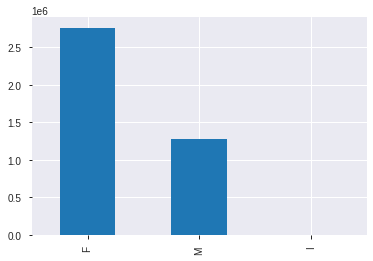

In [ ]:
%matplotlib inline
df_vacinacao['paciente_enumSexoBiologico'].value_counts().plot.bar()

In [ ]:
# Quantitativo Total de Vacinados por Raça

df_vacinacao['paciente_racaCor_valor'].value_counts()

BRANCA            1583085
SEM INFORMACAO    1260486
PARDA              598353
AMARELA            367770
PRETA              153679
INDIGENA            73092
Name: paciente_racaCor_valor, dtype: int64

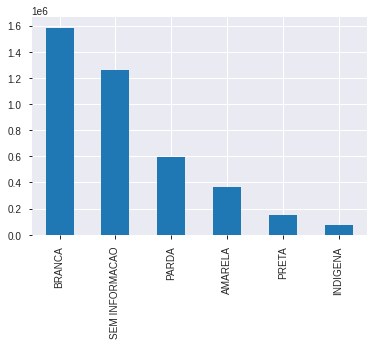

In [ ]:
df_vacinacao['paciente_racaCor_valor'].value_counts().plot.bar()

In [ ]:
# Quantitativo Total de Vacinados por Categoria

df_vacinacao['vacina_categoria_nome'].value_counts()

Trabalhadores de Saúde                             2630285
Faixa Etária                                       1110352
Pessoas de 60 anos ou mais institucionalizadas      110794
Povos Indígenas                                     103618
Pessoas com Deficiência                              10822
Povos e Comunidades Tradicionais                      9439
Forças de Segurança e Salvamento                      1069
Comorbidades                                           849
Pessoas em Situação de Rua                             352
Forças Armadas (membros ativos)                        260
Trabalhadores da Educação                              155
Funcionário do Sistema de Privação de Liberdade        109
População Privada de Liberdade                          41
Trabalhadores Industriais                               29
Trabalhadores Portuários                                 7
Name: vacina_categoria_nome, dtype: int64

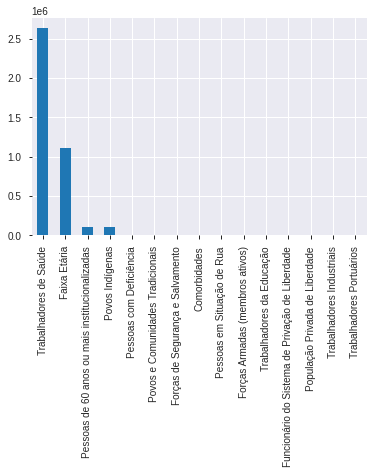

In [ ]:
df_vacinacao['vacina_categoria_nome'].value_counts().plot.bar()

In [ ]:
# Quantitativo Total de Vacinados por Fabricante

df_vacinacao['vacina_fabricante_nome'].value_counts()

Sinovac                             1742310
FUNDACAO BUTANTAN                   1211987
AstraZeneca/Oxford                   501874
FUNDACAO OSWALDO CRUZ                376498
Butantan/Sinovac                      68288
University of Oxford/AstraZeneca      62006
SERUM INSTITUTE OF INDIA LTD          54172
SINOVAC LIFE SCIENCE CO LTD           19304
BioNTech/Fosun Pharma/Pfizer             22
Janssen-Cilag                             4
Name: vacina_fabricante_nome, dtype: int64

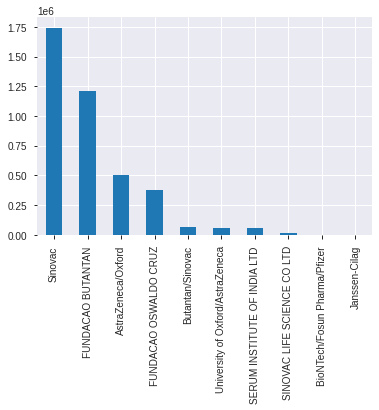

In [ ]:
df_vacinacao['vacina_fabricante_nome'].value_counts().plot.bar()

##Teste inicial de gráfico

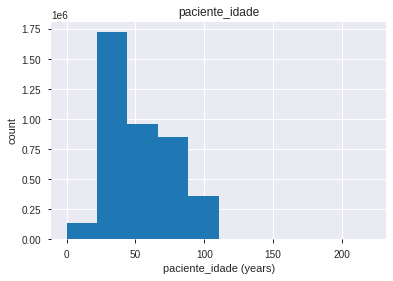

In [ ]:
# Plot 'Idade' variable in a histogram

pd.DataFrame.hist(df_vacinacao[['paciente_idade']])

plt.xlabel('paciente_idade (years)')

plt.ylabel('count')

plt.show()

## Importação e tratamento do Dataset de Estabelecimentos de Saúde (CNES)

In [ ]:
# Salve o dataset de CNES no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_cnes = pd.read_csv('/content/drive/My Drive/TESI_FCD/cnes_ativonone.csv',delimiter=',')

### Exploração inicial do DataSet de Estabelecimentos de Saúde (CNES)

In [ ]:
# Código reprodutível
# assert len(df_cnes) == 354804

In [ ]:
print('Total de registros:',len(df_cnes))    # Quantidade de registros do dataset
print('')
print(df_cnes.info())                        # Informações sobre o dataset 

# Observe o total de linhas e o total de colunas (12) do dataset

Total de registros: 354804

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354804 entries, 0 to 354803
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   co_cnes          354804 non-null  int64 
 1   co_ibge          354804 non-null  int64 
 2   no_fantasia      354796 non-null  object
 3   ds_tipo_unidade  354804 non-null  object
 4   tp_gestao        354804 non-null  object
 5   no_logradouro    354804 non-null  object
 6   nu_endereco      354517 non-null  object
 7   no_bairro        354801 non-null  object
 8   co_cep           354804 non-null  int64 
 9   uf               354434 non-null  object
 10  municipio        354434 non-null  object
 11  nu_telefone      279394 non-null  object
dtypes: int64(3), object(9)
memory usage: 32.5+ MB
None


In [ ]:
df_cnes.head(10)        # Visualização dos registros iniciais

,co_cnes,co_ibge,no_fantasia,ds_tipo_unidade,tp_gestao,no_logradouro,nu_endereco,no_bairro,co_cep,uf,municipio,nu_telefone
0,6577687,292240,SECRETARIA DE SAUDE DE MUTUIPE,CENTRAL DE GESTAO EM SAUDE,M,RUA RUY BARBOSA,S/N,CENTRO,45480000,BA,Mutuípe,NaN
1,6578500,500210,REABILIT CONSULTORIO DE FISIOTERAPIA,CLINICA/CENTRO DE ESPECIALIDADE,M,ALMIRANTE BARROSO,S/N,CENTRO,79260000,MS,Bela Vista,NaN
2,6577725,355660,SECRETARIA MUNICIPAL DE SAUDE E HIGIENE DE VER...,CENTRAL DE GESTAO EM SAUDE,M,RUA PAULO GUERREIRO FRANCO,997,CENTRO,17560000,SP,Vera Cruz,NaN
3,6577733,355410,CONS SERGIO LUIZ TEIXEIRA M PERES,CONSULTORIO ISOLADO,M,PCA MONS SILVA BARROS,254,CENTRO,12020070,SP,Taubaté,36351489
4,6577768,410490,LABORATORIO DOFF SOTTA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA DR JORGE XAVIER DA SILVA,1078,CENTRO,84165000,PR,Castro,3232-4854
5,6577806,420245,SAMU BOMBINHAS,UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA ...,M,RUA CACHALOTE,589,MORRINHOS,88215000,SC,Bombinhas,33934363
6,6577830,240260,CENTRO DE ATENCAO PSICOSSOCIAL CAPS II,CENTRO DE ATENCAO PSICOSSOCIAL,M,RUA POETISA DOLORES,13,CENTRO,59570000,RN,Ceará-Mirim,(84)3274-5914
7,6577865,315960,DIMENSAO CLINICA MEDICA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA CEL GABRIEL CAPISTRANO,256,CENTRO,37540000,MG,Santa Rita do Sapucaí,3534713531
8,6577873,355670,JULIANA PEREIRA PERSI,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA ROCINHA,213,CAPELA,13280000,SP,Vinhedo,38764932
9,6577881,231330,CENTRAL DE CONSULTORIOS,CLINICA/CENTRO DE ESPECIALIDADE,M,RUA MAFISA CIDRAO ROCHA,63,CENTRO,63660000,CE,Tauá,88-34371097


In [ ]:
#df_cnes.columns

In [ ]:
df_cnes['ds_tipo_unidade'].value_counts()

CONSULTORIO ISOLADO                                             175140
CLINICA/CENTRO DE ESPECIALIDADE                                  52766
CENTRO DE SAUDE/UNIDADE BASICA                                   38998
UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOLADO)               27067
POSTO DE SAUDE                                                   11345
POLICLINICA                                                       8457
CENTRAL DE GESTAO EM SAUDE                                        6059
HOSPITAL GERAL                                                    5752
UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA DE URGENCIA         4703
FARMACIA                                                          3213
CENTRO DE ATENCAO PSICOSSOCIAL                                    3065
UNIDADE DE VIGILANCIA EM SAUDE                                    3005
POLO ACADEMIA DA SAUDE                                            2523
UNIDADE MOVEL TERRESTRE                                           1460
PRONTO

### Eliminação de colunas e linhas que não serão utilizadas - Dataset Estabelecimentos de Saúde (CNES)

In [ ]:
# Eliminação das colunas que não serão utilizadas nas análises

df_cnes = df_cnes.drop(['co_ibge','no_logradouro','nu_endereco','no_bairro','co_cep', 'municipio','nu_telefone'],axis=1)

In [ ]:
# Como o dataset possui dados de todo o Brasil, os estados que não pertencem às regiões selecionadas para análise serão eliminados do dataframe
df_cnes = df_cnes.loc[(df_cnes['uf'].isin(UFs))]

In [ ]:
# Código reprodutível
# assert len(df_cnes) == 181213

In [ ]:
print('Total de registros:',len(df_cnes))    # Quantidade de registros do dataset após eliminação de linhas
print('')
print(df_cnes.info())                        # Informações sobre o dataset 

## É possível observar a redução do número total de linhas e do número total de colunas (5) do dataset

Total de registros: 183257

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183257 entries, 2 to 354803
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   co_cnes          183257 non-null  int64 
 1   no_fantasia      183252 non-null  object
 2   ds_tipo_unidade  183257 non-null  object
 3   tp_gestao        183257 non-null  object
 4   uf               183257 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.4+ MB
None


### Tratamento de valores nulos e/ou faltantes

In [ ]:
df_cnes.count()        # Quantidade de registros por coluna. 
                      # É possível observar que algumas colunas possuem quatidade inferior de registros, o que indica que será necessário 
                      #    tratamento de dados se essas colunas forem necessárias para análise

co_cnes            183257
no_fantasia        183252
ds_tipo_unidade    183257
tp_gestao          183257
uf                 183257
dtype: int64

In [ ]:
# falta incluir tratamento de nulos e valores faltantes

### Identificação e tratamento de valores duplicados

In [ ]:
# falta incluir tratamento de valores duplicados

## Merge entre os dataFrames de Vacinação e CNES

In [ ]:
df_merge = pd.merge(df_vacinacao, df_cnes, on=None, left_on='estabelecimento_valor', right_on='co_cnes')

In [ ]:
print(df_merge)

                                       document_id  ...  uf
0        c6756cf9-0e0e-456b-86d2-94309b47e702-i0b0  ...  SP
1        85a346cd-aae6-47a6-8b89-1ce2c3dcacbb-i0b0  ...  SP
2        d250e4f3-6ff9-4f37-8f6d-cd5a9f3879cd-i0b0  ...  SP
3        92a49f7c-be44-4796-9e88-7527f5e355b2-i0b0  ...  SP
4        968dba04-edde-4371-9ceb-206ec2b6e2da-i0b0  ...  SP
...                                            ...  ...  ..
3896584  2dfcc705-e827-478d-83a6-0f46005c0389-i0b0  ...  MG
3896585  7180c4be-1f9b-462d-a458-56cae6156fdc-i0b0  ...  MG
3896586  0dd9723f-740d-4ed6-80aa-9cef3bd89473-i0b0  ...  MG
3896587  6da9166e-0e36-4457-a818-ded1b8e95129-i0b0  ...  MG
3896588  eb4b30c7-ea3b-4002-bf6b-9664fa56ee28-i0b0  ...  AM

[3896589 rows x 31 columns]


In [ ]:
# Criação do dataframe da região sudeste
df_sudeste = df_merge.query('paciente_endereco_uf in ["ES", "MG", "RJ", "SP"]')

In [ ]:
df_sudeste

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
0,c6756cf9-0e0e-456b-86d2-94309b47e702-i0b0,3c73310d030b31ec5c73deda79bad2e8dbcc388839b6cd...,43.0,1977-12-05,F,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-12T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-12 10:02:44,2747723,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
1,85a346cd-aae6-47a6-8b89-1ce2c3dcacbb-i0b0,35d55970473ce949b1c9cd7a082b1a04a879378113f16e...,56.0,1964-12-10,F,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-09T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-09 04:02:37,2747723,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
2,d250e4f3-6ff9-4f37-8f6d-cd5a9f3879cd-i0b0,97c8e4ce239cd99aa3db8122f785c58436328db973b0e5...,40.0,1980-06-02,M,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,AstraZeneca/Oxford,2021-02-03T00:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-03 10:02:10,2747723,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3,92a49f7c-be44-4796-9e88-7527f5e355b2-i0b0,a581e01db894c667d6e6bd1793e613d5981cdc7ee0e86c...,79.0,1941-07-05,F,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,352270.0,ITAPOLIS,SP,204,Pessoas de 75 a 79 anos,2.0,Faixa Etária,Sinovac,2021-02-08T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-08 06:02:20,2747723,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
4,968dba04-edde-4371-9ceb-206ec2b6e2da-i0b0,fea3a597ecd86a91e05f791b597c63cf540e7dc4451d40...,95.0,1925-08-03,F,1.0,BRANCA,352270,10,ITAPOLIS,BRASIL,SP,B,2747723,352270.0,ITAPOLIS,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,Sinovac,2021-02-08T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-08 05:02:01,2747723,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896583,3029db2c-2fc1-477a-a47e-890837556c22-i0b0,fa4ce5506acc064ac80f257006e8a9dbfebf4ccc663f19...,92.0,1928-10-28,F,99.0,SEM INFORMACAO,312770,10,GOVERNADOR VALADARES,BRASIL,MG,B,2119021,312770.0,GOVERNADOR VALADARES,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-10T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-24 19:09:36,2119021,ESF TURMALINA I,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3896584,2dfcc705-e827-478d-83a6-0f46005c0389-i0b0,fcc80a11d76b1640683f91741086730b7ba90e2ff43412...,93.0,1928-01-26,M,1.0,BRANCA,314510,10,NOVA RESENDE,BRASIL,MG,B,9399798,314510.0,NOVA RESENDE,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-12T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-26 18:37:37,9399798,PSF SERRA II,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3896585,7180c4be-1f9b-462d-a458-56cae6156fdc-i0b0,81a587c7b8c00bd970363bd409a3e2ec055ff3b01cbc80...,21.0,1999-06-25,F,3.0,PARDA,313250,10,ITAMARANDIBA,BRASIL,MG,B,2178168,313250.0,ITAMARANDIBA,MG,0,NaN,NaN,NaN,SERUM INSTITUTE OF INDIA LTD,2021-01-22T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 13:58:38,2178168,POSTO DE SAUDE DE CONTRATO,CENTRO DE SAUD

In [ ]:
# Total de vacinados por UF na região sudeste
df_sudeste['paciente_endereco_uf'].value_counts()

SP    2117318
MG     580997
RJ     425267
ES     121709
Name: paciente_endereco_uf, dtype: int64

In [ ]:
# Total de estabelecimentos de saúde dos vacinados da região sudeste (Aparece estados da região norte para trabalhadores da saúde )
df_sudeste['estabelecimento_uf'].value_counts()

SP    2141063
MG     560408
RJ     417886
ES     121240
AM       1762
PA       1619
TO        413
RO        365
RR        277
AC        155
AP        103
Name: estabelecimento_uf, dtype: int64

In [ ]:
# Total de vacinados fora do seu estado :(
df_sudeste.query('paciente_endereco_uf != estabelecimento_uf')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
20,473eac75-5232-44b6-bbee-f48aa95efe37-i0b0,482372bcb1425f8feb7ede07ca37559153d95b0a71ceda...,70.0,1950-08-04,M,1.0,BRANCA,314700,10,PARACATU,BRASIL,MG,B,2747723,352270.0,ITAPOLIS,SP,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,Sinovac,2021-02-08T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-08 05:02:49,2747723,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
138,2fb02794-75bb-46d4-b9a8-aad9dbc44449-i0b0,19a66715dfd40288664a107ac67e8d8e346fbf310684fc...,44.0,1976-12-01,M,1.0,BRANCA,310620,10,BELO HORIZONTE,BRASIL,MG,B,2747723,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-12T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-12 04:02:16,2747723,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
294,29f3635f-cb7d-425b-8b51-f88328a9056f-i0b0,19a66715dfd40288664a107ac67e8d8e346fbf310684fc...,44.0,1976-12-01,M,1.0,BRANCA,310620,10,BELO HORIZONTE,BRASIL,MG,B,2747723,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 18:18:51,2747723,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
726,d850726c-481c-4b4f-90ee-fa5687a6587d-i0b0,a4fa0565919a5467893804b00b294366153be68ecb5e66...,25.0,1995-10-19,F,99.0,SEM INFORMACAO,320340,10,MIMOSO DO SUL,BRASIL,ES,B,7723628,130240.0,LABREA,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,FUNDACAO BUTANTAN,2021-02-17T03:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-26 15:12:49,7723628,DISTRITO SANITARIO ESPECIAL INDIGENA MEDIO PURUS,UNIDADE DE ATENCAO A SAUDE INDIGENA,M,AM
933,89988ce5-ccac-4993-8a6a-6d28241615cd-i0b0,82994c75dc27477c0fe47cfcfbf739270c6ebeb1bf11fa...,40.0,1980-02-10,F,99.0,SEM INFORMACAO,354100,10,PRAIA GRANDE,BRASIL,SP,B,7723628,130240.0,LABREA,AM,907,Enfermeiro(a),9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-02-04T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-05 19:12:28,7723628,DISTRITO SANITARIO ESPECIAL INDIGENA MEDIO PURUS,UNIDADE DE ATENCAO A SAUDE INDIGENA,M,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895503,9043397e-ba9a-4eaf-95a8-62ad02c2adaf-i0b0,309313fe8303321b27008a9e9e6393cd3b3fb8445dc2cb...,39.0,1981-10-20,M,99.0,SEM INFORMACAO,311410,10,CARMO DE MINAS,BRASIL,MG,B,9074805,354990.0,SAO JOSE DOS CAMPOS,SP,0,NaN,NaN,NaN,SERUM INSTITUTE OF INDIA LTD,2021-01-27T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-22 14:15:25,9074805,UPA CAMPO DOS ALEMAES,PRONTO ATENDIMENTO,M,SP
3895607,c4e2163d-c00f-4e1d-ac8b-d9321dcb9557-i0b0,f740d8c741f78b60472e1ce9528556ed4bd7e5418b9548...,50.0,1970-05-11,F,1.0,BRANCA,330630,10,VOLTA REDONDA,BRASIL,RJ,B,2074672,350315.0,ARAPEI,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 07:01:40,2074672,UNIDADE BASICA DE SAUDE DE ARAPEI DR HAROLDO V...,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3896222,257848fa-99ae-4fc4-bb98-621e4121c1c5-i0b0,9029a3006931995c8172c87c375c67d584337e3be200ea...,96.0,1925-02-06,F,1.0,BRANCA,350380,10,ARTUR NOGUEIRA,BRASIL,SP,B,9407367,316860.0,TEOFILO OTONI,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-0

In [ ]:
# Criação do dataframe da região norte
df_norte = df_merge.query('paciente_endereco_uf in ["AM", "AC", "AP", "PA", "RO", "RR", "TO"]')

In [ ]:
df_norte['paciente_endereco_uf'].value_counts()

AM    227580
PA    171247
TO     53177
RO     37648
RR     25252
AC     23737
AP     18203
Name: paciente_endereco_uf, dtype: int64

In [ ]:
df_norte

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
274,6f1e52c1-f3ef-4e12-bfee-73a7d8659fea-i0b0,4707a8c3cc8486c29469e651806283699c2aad7d776d39...,38.0,1983-01-03,M,1.0,BRANCA,110004,10,CACOAL,BRASIL,RO,B,2747723,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-15T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-15 10:02:11,2747723,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
378,e7dd3437-3d9e-406c-88cf-e7aa4d4d4949-i0b0,4707a8c3cc8486c29469e651806283699c2aad7d776d39...,38.0,1983-01-03,M,1.0,BRANCA,110004,10,CACOAL,BRASIL,RO,B,2747723,352270.0,ITAPOLIS,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-21 06:01:30,2747723,UBS JARDIM REDENCAO ITAPOLIS,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
573,8f4eb329-7faf-4c69-a61c-9dc101542879-i0b0,db1db6b5eb18d38b0e40a112ba515a8f36adb47d605276...,25.0,1995-11-19,F,99.0,SEM INFORMACAO,130410,10,TAPAUA,BRASIL,AM,B,7723628,130240.0,LABREA,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,FUNDACAO BUTANTAN,2021-02-03T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-11 19:06:14,7723628,DISTRITO SANITARIO ESPECIAL INDIGENA MEDIO PURUS,UNIDADE DE ATENCAO A SAUDE INDIGENA,M,AM
574,e452b7e4-d1e0-446d-a412-ed80b7d91018-i0b0,241d5f21be9e3a62327140e02e0e45667db1e6801f5d36...,21.0,1999-08-12,M,99.0,SEM INFORMACAO,130090,10,CANUTAMA,BRASIL,AM,B,7723628,130240.0,LABREA,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,FUNDACAO BUTANTAN,2021-02-04T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-10 23:33:03,7723628,DISTRITO SANITARIO ESPECIAL INDIGENA MEDIO PURUS,UNIDADE DE ATENCAO A SAUDE INDIGENA,M,AM
575,fada2865-0337-4556-9c7b-129ee7d5b787-i0b0,6443988314660185640e5e0ab7fb7e788ba9ca17c3fb3f...,68.0,1952-08-24,F,5.0,INDIGENA,130410,10,TAPAUA,BRASIL,AM,B,7723628,130240.0,LABREA,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,FUNDACAO BUTANTAN,2021-02-04T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-10 13:37:32,7723628,DISTRITO SANITARIO ESPECIAL INDIGENA MEDIO PURUS,UNIDADE DE ATENCAO A SAUDE INDIGENA,M,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3896574,d1c45853-fd0a-4918-b627-830532d68e98-i0b0,fbb516825bc500e651b341eec69f8e8dbbc419e1752bb0...,47.0,1973-07-21,F,1.0,BRANCA,170950,10,GURUPI,BRASIL,TO,B,2546418,170950.0,GURUPI,TO,907,Enfermeiro(a),9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-10T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-15 19:36:38,2546418,UNIDADE DE SAUDE VILA IRIS,CENTRO DE SAUDE/UNIDADE BASICA,M,TO
3896575,1faf2d6d-fa96-4971-a6e4-06d67c99a8a0-i0b0,ef58501063fb29e919f3d6c8727106e3fbae4b5d11069a...,43.0,1977-10-23,M,99.0,SEM INFORMACAO,172100,10,PALMAS,BRASIL,TO,B,2546418,170950.0,GURUPI,TO,912,Médico,9.0,Trabalhadores de Saúde,FUNDACAO OSWALDO CRUZ,2021-02-10T03:00:00.000Z,1ª Dose,Vacina Covid-19 - Covishield,2021-02-15 19:34:55,2546418,UNIDADE DE SAUDE VILA IRIS,CENTRO DE SAUDE/UNIDADE BASICA,M,TO
3896576,236bd875-8b77-4ffc-b97e-c235a4c1c48a-i0b0,303c26e3ec166f799dc301d8c942a2d0825a912e05bee2...,27.0,1993-09-10,F,99.0,SEM INFORMACAO,170950,10,GURUPI,BRASIL,TO,B,2546418,170950.0,GURUPI,TO,907,Enfermeiro(a),9.0,Trabalhadores de Saúde,FUNDAC

In [ ]:
df_norte['estabelecimento_uf'].value_counts()

AM    228437
PA    167927
TO     51745
RO     35299
RR     25081
AC     22689
AP     18092
SP      6085
RJ       646
MG       624
ES       219
Name: estabelecimento_uf, dtype: int64